In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math
from functools import reduce
import numpy as np

In [3]:
pd.set_option("display.max_colwidth", None)

In [4]:
listings = pd.read_csv("data/listings.csv")

/tmp/ipykernel_335738/1289558687.py:1: DtypeWarning: Columns (59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv("data/listings.csv")


# Entendimiento inicial de los datos

Veamos el aspecto del DataFrame

In [5]:
listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,197677,https://www.airbnb.com/rooms/197677,20240629155511,2024-06-30,city scrape,Oshiage Holiday Apartment,NaN,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,...,4.83,4.54,4.79,M130003350,f,1,1,0,0,1.13
1,776070,https://www.airbnb.com/rooms/776070,20240629155511,2024-06-29,city scrape,Kero-kero house room 1,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,https://a0.muscache.com/pictures/efd9f039-dbd2...,801494,...,4.98,4.84,4.92,M130000243,f,1,0,1,0,1.81
2,905944,https://www.airbnb.com/rooms/905944,20240629155511,2024-06-30,city scrape,4F - Near Shinjuku & Shibuya,NEWLY RENOVATED property entirely for you & yo...,Hatagaya is a great neighborhood located 4 min...,https://a0.muscache.com/pictures/miso/Hosting-...,4847803,...,4.91,4.79,4.79,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...,t,6,6,0,0,1.60
3,1016831,https://www.airbnb.com/rooms/1016831,20240629155511,2024-06-29,city scrape,5 mins Shibuya Cat modern sunny Shimokita,"Hi there, I am Wakana and I live with my two f...",The location is walkable distance to famous Sh...,https://a0.muscache.com/pictures/airflow/Hosti...,5596383,...,4.98,4.92,4.90,M130001107,f,2,1,1,0,1.96
4,1196177,https://www.airbnb.com/rooms/1196177,20240629155511,2024-06-29,city scrape,Stay with host Cozy private room Senju area,Ｓtay with host.We can help your travel.<br />B...,There are shopping mall near Senjuohashi stati...,https://a0.muscache.com/pictures/72890882/05ec...,5686404,...,4.91,4.73,4.80,M130007760,f,1,0,1,0,0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16513,1188807027935790805,https://www.airbnb.com/rooms/1188807027935790805,20240629155511,2024-06-30,city scrape,quiet/morden/shibuya/shinjyuku,Welcome to stay in Kevin's apartment^_^<br />Y...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,29209062,...,NaN,NaN,NaN,M130041583,t,5,5,0,0,NaN
16514,1188807658642978418,https://www.airbnb.com/rooms/1188807658642978418,20240629155511,2024-06-29,city scrape,新开业离池袋地铁仅15分钟 板桥区政府附近 商店街正中,Itabashi Honmachi Station is a vibrant downtow...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,585909521,...,NaN,NaN,NaN,M130041688,t,1,1,0,0,NaN
16515,1188862130812517749,https://www.airbnb.com/rooms/1188862130812517749,20240629155511,2024-06-29,city scrape,匯家本町ビル 一户建三层可住8人 平和岛站步行4分钟,Japanese-style tatami is built on three floors...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,325747621,...,NaN,NaN,NaN,Special Economic Zoning Act | ６健生発第 10666 号,t,25,16,9,0,NaN
16516,1189007613727558111,https://www.airbnb.com/rooms/1189007613727558111,20240629155511,2024-06-30,city scrape,The FLAT 103,It is a flat built in 2020.<br />9 mins walk f...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,152574527,...,NaN,NaN,NaN,Hotels and Inns Business Act | 墨田区保健所 | 6墨福衛生環...,t,1,1,0,0,NaN


Analicemos cómo se ven cada una de las columnas

In [9]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16518 entries, 0 to 16517
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            16518 non-null  int64  
 1   listing_url                                   16518 non-null  object 
 2   scrape_id                                     16518 non-null  int64  
 3   last_scraped                                  16518 non-null  object 
 4   source                                        16518 non-null  object 
 5   name                                          16518 non-null  object 
 6   description                                   16202 non-null  object 
 7   neighborhood_overview                         10699 non-null  object 
 8   picture_url                                   16518 non-null  object 
 9   host_id                                       16518 non-null 

In [155]:
listings.shape

(16518, 75)

Se tienen 16.518 de diferentes propiedades con 75 features o columnas descritivas de estos. Veamos cuáles son

In [11]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

Después de analizar eldiccionario de datos se considera que las cinco columnas más relevantes para el análisis serán las siguientes

In [171]:
interest_columns = [
    "neighbourhood_cleansed",
    "accommodates",
    "price",
    "review_scores_rating",
    "property_type"
]

In [172]:
listings[interest_columns]

,neighbourhood_cleansed,accommodates,price,review_scores_rating,property_type
0,Sumida Ku,2,12000.0,4.78,Entire rental unit
1,Kita Ku,1,9652.0,4.98,Private room in home
2,Shibuya Ku,6,25738.0,4.79,Entire rental unit
3,Setagaya Ku,2,23286.0,4.95,Private room in home
4,Adachi Ku,3,7500.0,4.78,Private room in home
...,...,...,...,...,...
16513,Shibuya Ku,4,16000.0,NaN,Entire rental unit
16514,Itabashi Ku,2,4714.0,NaN,Entire rental unit
16515,Ota Ku,8,13186.0,NaN,Entire home
16516,Sumida Ku,3,10400.0,NaN,Entire rental unit


In [173]:
listings[interest_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16518 entries, 0 to 16517
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  16518 non-null  object 
 1   accommodates            16518 non-null  int64  
 2   price                   14805 non-null  float64
 3   review_scores_rating    14597 non-null  float64
 4   property_type           16518 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 645.4+ KB


## Veamos un análisis univariado breve de cada una de ellas

Analicemos el número de propiedaes publicadas por vecindario 

<Axes: title={'center': 'Number of properties by neighbourhood'}, xlabel='neighbourhood_cleansed'>

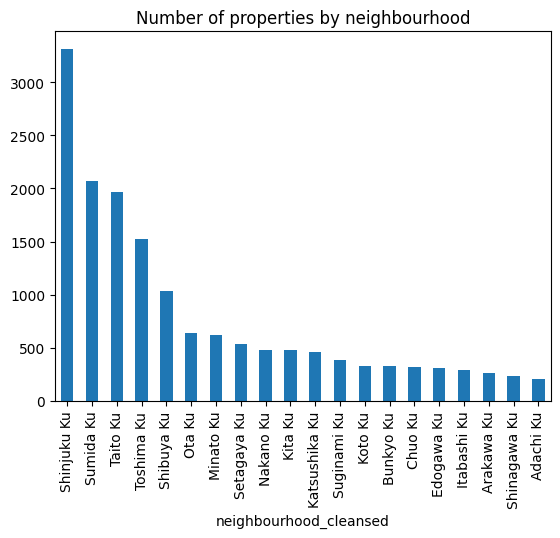

In [183]:
listings.groupby("neighbourhood_cleansed").agg("id").count().sort_values(ascending=False)[:20].plot.bar(title="Number of properties by neighbourhood")

Se observa que Shinjuko es elvecindario con la mayor cantidad de propiedades listadas, seguido de Sumida y Taito. 

Veamos ahora cómo se distribuyen las acomodaciones

<Axes: title={'center': 'Number of properties by pnumber of accommodates'}, xlabel='accommodates'>

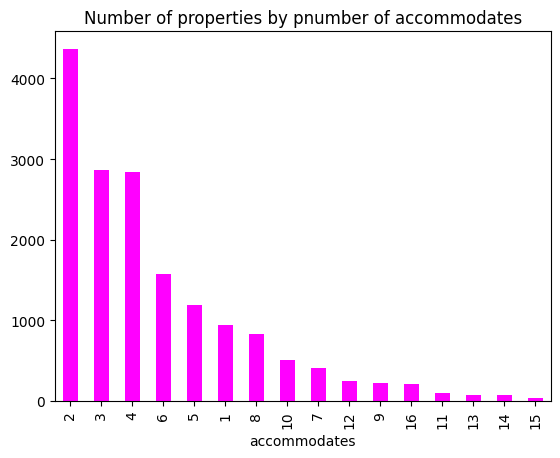

In [182]:
listings.groupby("accommodates").agg("id").count().sort_values(ascending=False)[:20].plot.bar(title="Number of properties by pnumber of accommodates",color="magenta")

Se observa que la mayoría de las propiedades listadas tienen menos de 5 habitaciones

Analicemos ahora la distribución de los precios

In [26]:
listings["price"] = listings["price"].str.replace("[$,]", "", regex=True).astype(float)

<Axes: ylabel='Frequency'>

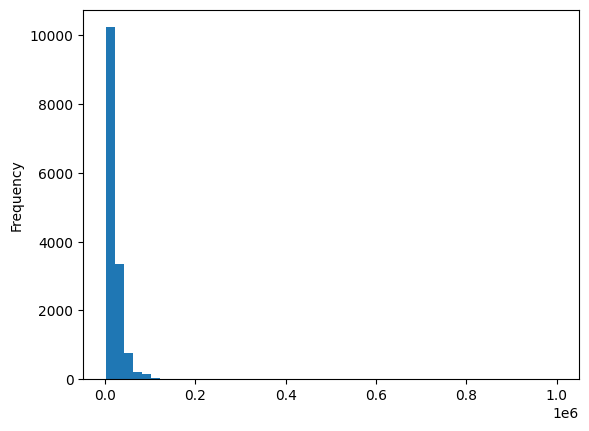

In [170]:
listings["price"].plot.hist(bins=50)

Debido a que hay una gran cantidad de valores atípicos, se hará un tratamiento sencillo de outliers teniendo en cuenta únicamente los valores inferior al tercer percentil sumado al rango intercuartíl por 1.5

In [30]:
q1 = listings["price"].quantile(0.25)
q3 = listings["price"].quantile(0.75)
price_iqr = q3 - q1

[]

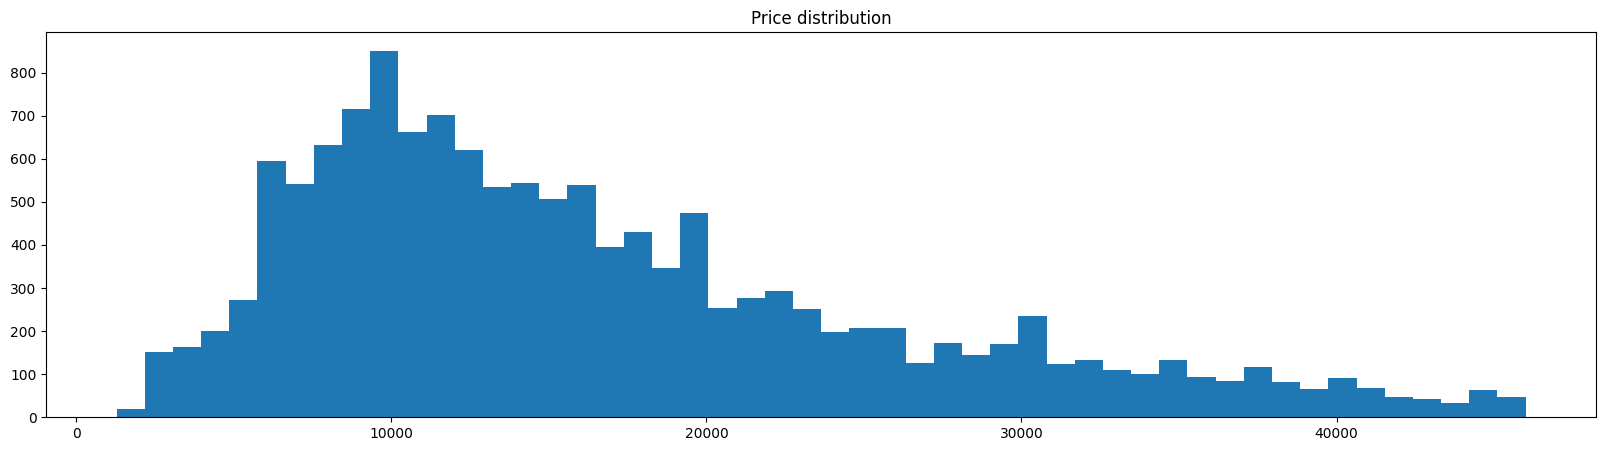

In [33]:
plt.figure(figsize=(20, 5))
plt.hist(listings.loc[listings["price"] <= (q3 + 1.5*price_iqr)]["price"], bins=50)
plt.title("Price distribution")
plt.plot()

Ahora se observa mejor la distribución. Claramente se presenta una asimetría positiva, es decir, hay una mayor cantidad de propiedades en elrango izquierdo del espectro (precios más bajos)

<Axes: title={'center': 'Number of properties by property type'}, xlabel='property_type'>

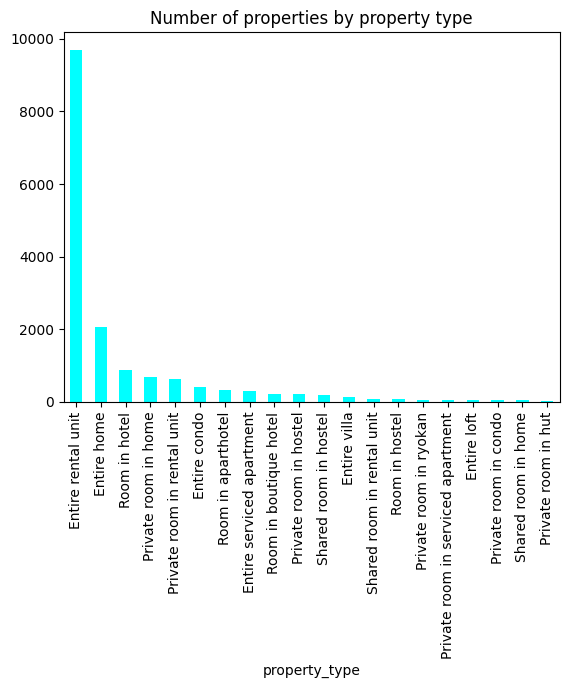

In [180]:
listings.groupby("property_type").agg("id").count().sort_values(ascending=False)[:20].plot.bar(title="Number of properties by property type",color="cyan")


In [27]:
listings["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

Veamos la distribución por ratings

<Axes: title={'center': 'rating distribution'}>

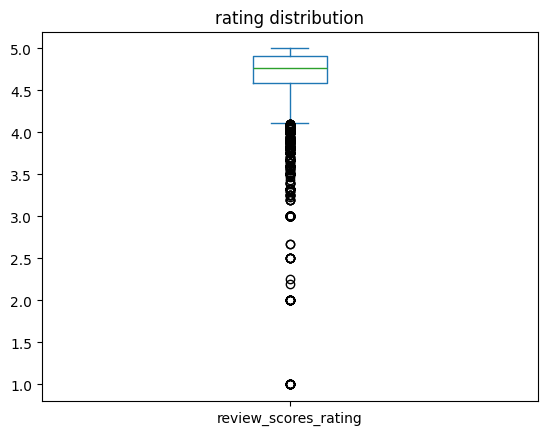

In [184]:
listings["review_scores_rating"].plot.box(title="rating distribution")

Se aprecia que la mayoría de las propiedades tienen un rating superior a 4. El percentil 0.5 se encuentra incluso por encima de 4.5. Calificaciones inferiores a 4.0 podrían considerarse valores atípicos.

# Estrategia de Análisis

Se analizarán los mejores vecinarios basado en un score bayesiano (Se hará una breve descripción de este proceso) con base en los ratings que han obtenido todas las propiedades de cada uno de ellos. Una vez se identifiquen los mejores vecindarios se seleccionarán aquellos con los precios más altos (lo que debería traer consigo mayores rendimientos) mediante una medida de tendencia central robusta con los valores atípicos como la mediana. Se analizará posteriormente el tipo de propiedad que tenga una mayor media geométrica entre el precio y el rating para identificar las más rentables y con mejor rating. Finalmente se analizará el número de acomodaciones con mayor cantidad de publicaciones ya que esto será un indicio de la oferta de la zona. Con esto se espera obtener resultados contundentes que indiquen el mejor tipo de propiedad y la mejor ubicación para realizar una inversión.

# Desarrollo de estrategia de análisis

### Analicemos los vecindarios con mejor rating

Debido a que un vecindario podría tener un único inmueble con una calificación de cindo y por lotanto ser considerado elmejor, se utilizará un score bayesiano para evitar este tipo de inconvenientes.

El score bayesiano permite cuantificar laimportancia de un objeto dado un conjunto de calificaciones en una escala, en este caso de 1 a 5 (Se realizará un redondeo de calificaciones para facilidad del cálculo del score),mediante la suposición de que la distribución de las calificaciones viene de una distribución de Dirichlet donde se calcula un intervalo de confianza que permite genarar el score. Una descripción del proceso puede econtrarse en el siguiente enlace: https://www.evanmiller.org/ranking-items-with-star-ratings.html

In [68]:
# It will be defined a function wich calculates Bayesian Score
# so as to generate a neighborhood raking
def bayesian_score(ratings, confidence=0.95):
    """
      Function to calculate wilson score for N star rating system.

      params:
        ratings (list): Count of star ratings where ith index represent the votes for that category i.e. [3, 5, 6, 7, 10]
                  First value are califications with 1 star, second with 2 and so on...
        confidence (int): Confidence interval
      returns:
        score (float): Bayesian score value
    """
    # If there is no ratings to analize, returns a Beyesian score of zero
    if sum(ratings) == 0:
        return 0

    # Define necessary expressions
    rating_scale = len(ratings)
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    ratings_sum = sum(ratings)
    first_expr = 0.0
    second_expr = 0.0

    # Calculates Bayesian score
    for k in range(len(ratings)):
        first_expr += (k + 1)*(ratings[k] + 1) / (ratings_sum + rating_scale)
        second_expr += (k + 1)*(k + 1)*(ratings[k] + 1) / (ratings_sum + rating_scale)
    score = first_expr - z * math.sqrt(
        (second_expr - first_expr*first_expr) / (ratings_sum + rating_scale + 1)
      )

    return score

In [60]:
# It only will be taken intoaccount properties with no null ratings
ratings = listings[["neighbourhood_cleansed", "review_scores_rating"]].dropna(subset="review_scores_rating")

In [62]:
# Round ratings so as to make it easier to calculate bayesian score
ratings["review_scores_rating_rounded"] = ratings["review_scores_rating"].apply(lambda rating: round(rating))

In [65]:
ratings

,neighbourhood_cleansed,review_scores_rating,review_scores_rating_rounded
0,Sumida Ku,4.78,5
1,Kita Ku,4.98,5
2,Shibuya Ku,4.79,5
3,Setagaya Ku,4.95,5
4,Adachi Ku,4.78,5
...,...,...,...
16331,Shinjuku Ku,5.00,5
16332,Shinjuku Ku,5.00,5
16336,Ome Shi,5.00,5
16340,Sumida Ku,5.00,5


In [69]:
total_by_ratings = ratings[["neighbourhood_cleansed", "review_scores_rating_rounded"]]

l = []

# For each rating from 1 to 5 calculate the number of ratings for each neightbourhood
for i in range(5):
  df = ratings[ratings["review_scores_rating_rounded"] == i + 1][["neighbourhood_cleansed", "review_scores_rating_rounded"]].groupby(
    "neighbourhood_cleansed"
  ).agg(number_rating=("review_scores_rating_rounded", "count"))

  df.rename(columns={"number_rating": f"number_rating_{i + 1}"}, inplace=True)

  l.append(df)

df = reduce(lambda x, y: x.join(y), l)

df.fillna(0, inplace=True)

# Calculate bayesian score based on a column with an array of ratings
df["list_of_scores"] = df.apply(lambda row: [count_of_ratings for count_of_ratings in row], axis=1)

df["bayesian_score"] = df["list_of_scores"].apply(lambda x: bayesian_score(x))

In [96]:
neigborhood_benchmark = df[["bayesian_score", "list_of_scores"]].sort_values(by="bayesian_score", ascending=False)[:5]

In [97]:
neigborhood_benchmark

,bayesian_score,list_of_scores
neighbourhood_cleansed,,
Sumida Ku,4.776923,"[2.0, 1.0, 17.0, 314.0, 1486.0]"
Taito Ku,4.775069,"[4.0, 1.0, 12.0, 308.0, 1446.0]"
Ota Ku,4.765302,"[2.0, 1.0, 3.0, 81.0, 468.0]"
Shibuya Ku,4.749280,"[1.0, 0.0, 5.0, 188.0, 759.0]"
Toshima Ku,4.746770,"[2.0, 1.0, 6.0, 273.0, 1055.0]"


Analizaremos entonces en los vecindarios con el mejor score bayesiano los tipos de propiedades que tienen un mejortipo de calificación respecto a su precio

In [98]:
neigborhood_benchmark = list(neigborhood_benchmark.index)

In [99]:
neigborhood_benchmark_df = listings[listings["neighbourhood_cleansed"].isin(neigborhood_benchmark)][interest_columns]

In [100]:
neigborhood_benchmark_df

,neighbourhood_cleansed,accommodates,bathrooms,price,review_scores_rating,property_type
0,Sumida Ku,2,1.0,12000.0,4.78,Entire rental unit
2,Shibuya Ku,6,1.0,25738.0,4.79,Entire rental unit
5,Shibuya Ku,3,1.0,62047.0,4.95,Entire home
11,Toshima Ku,1,2.0,6000.0,4.70,Private room in home
12,Toshima Ku,1,2.0,5500.0,4.67,Private room in home
...,...,...,...,...,...,...
16512,Taito Ku,4,0.5,13257.0,NaN,Entire rental unit
16513,Shibuya Ku,4,1.0,16000.0,NaN,Entire rental unit
16515,Ota Ku,8,2.0,13186.0,NaN,Entire home
16516,Sumida Ku,3,1.0,10400.0,NaN,Entire rental unit


In [78]:
ratings = listings[["property_type", "review_scores_rating"]].dropna(subset="review_scores_rating")

In [101]:
neigborhood_benchmark

['Sumida Ku', 'Taito Ku', 'Ota Ku', 'Shibuya Ku', 'Toshima Ku']

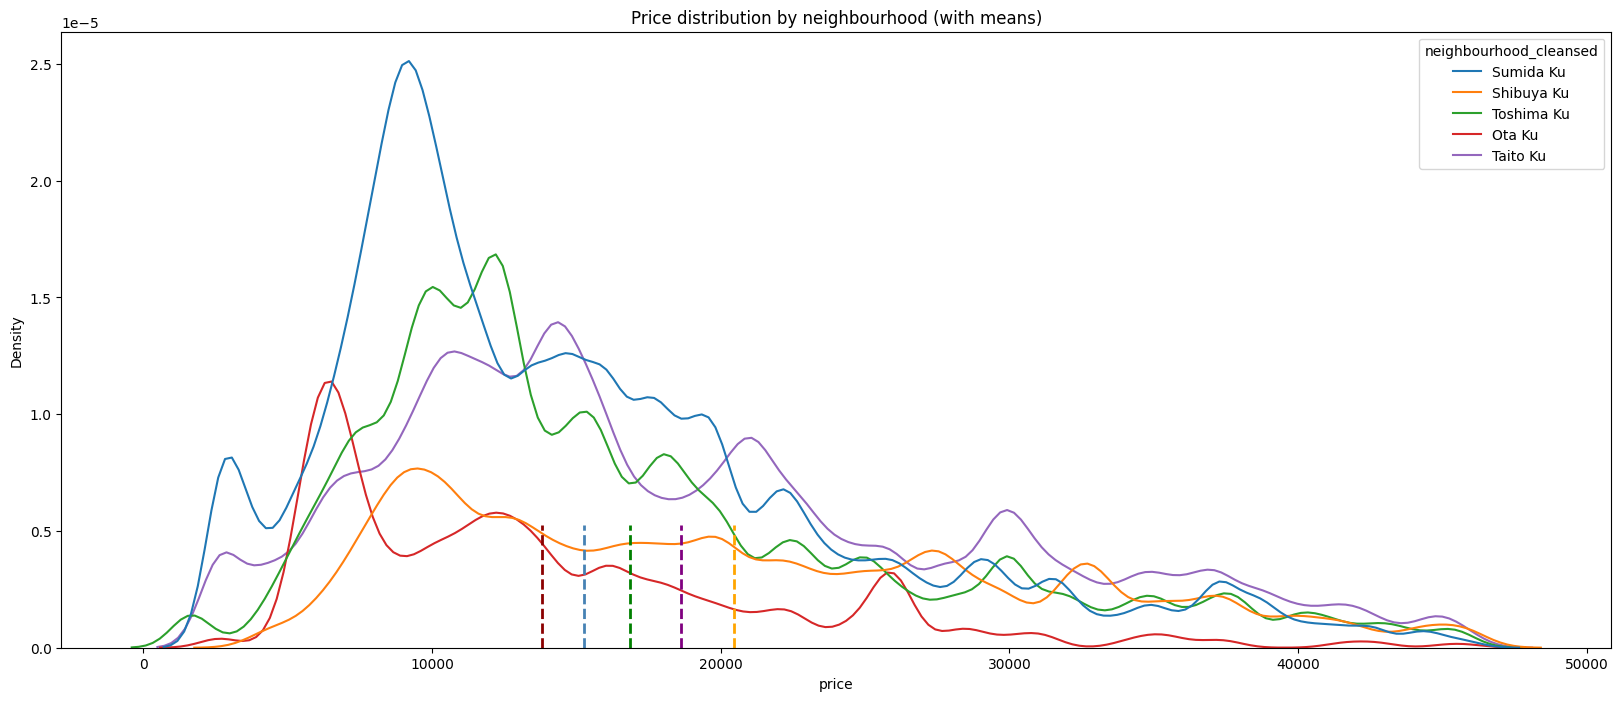

In [119]:
# Plot a distribution of prices with neighbourhood with better ratings
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings.loc[listings["price"] <= (q3 + 1.5 * price_iqr)].loc[listings["neighbourhood_cleansed"].isin(neigborhood_benchmark)],
    x="price",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(neigborhood_benchmark, ["steelblue", "purple", "darkred", "orange", "green"]):
    ax.axvline(listings.loc[listings["price"] <= (q3 + 1.5 * price_iqr)].loc[listings["neighbourhood_cleansed"] == neighbourhood, "price"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

In [187]:

listings[listings["neighbourhood_cleansed"].isin(neigborhood_benchmark)].groupby("neighbourhood_cleansed").agg("price").median().sort_values(ascending=False).rename("Median by neighbourhod")

neighbourhood_cleansed
Shibuya Ku    20349.0
Taito Ku      17476.0
Toshima Ku    14429.0
Sumida Ku     13571.0
Ota Ku        12103.5
Name: Median by neighbourhod, dtype: float64

## Shibuya ku

In [153]:
rating_price_median_shibuya = listings[
    listings["neighbourhood_cleansed"] == "Shibuya Ku"
][interest_columns].groupby("property_type").agg({"review_scores_rating": "median", "price": "median"})

In [143]:
rating_price_median_shibuya

,review_scores_rating,price
property_type,,
Entire cabin,4.800,16086.0
Entire condo,4.810,34000.0
Entire guest suite,4.880,18000.0
Entire home,4.850,44071.5
Entire loft,4.785,33500.0
Entire rental unit,4.750,19143.0
Entire serviced apartment,4.870,23429.0
Entire townhouse,4.960,42686.0
Entire villa,4.785,29446.0


In [192]:
rating_price_median_shibuya["price_rating_geometric_median"] = rating_price_median_shibuya.apply(
    lambda row: np.sqrt(row["review_scores_rating"] * row["price"]), axis=1
)

rating_price_median_shibuya.sort_values("price_rating_geometric_median", ascending=False)[:5]

,review_scores_rating,price,price_rating_geometric_median
property_type,,,
Room in hotel,5.00,95156.0,689.768077
Entire home,4.85,44071.5,462.327562
Entire townhouse,4.96,42686.0,460.133198
Room in aparthotel,4.78,38821.0,430.771842
Entire condo,4.81,34000.0,404.400791


Se observa que los tipos de propieda con mejor relación precio rating (basado en una media geométrica) son las habitaciones de hotel, seguidas de casas enteras. Veamos ahora el número de comodaciones más comunes para estas acomodaciones ya que esto podrá indicar la demanda en el sector

In [193]:
benchmark_price_rating = rating_price_median_shibuya.sort_values("price_rating_geometric_median", ascending=False)[:5].index

In [194]:
listings[
    (listings["property_type"].isin(benchmark_price_rating)) & (listings["neighbourhood_cleansed"] == "Shibuya Ku")
].groupby("accommodates").agg("id").count().sort_values(ascending=False)

accommodates
8     31
6     21
4     17
10    17
9     10
3      8
16     8
5      6
12     5
7      3
2      3
11     3
13     2
14     2
15     1
Name: id, dtype: int64

<Axes: title={'center': 'Porperties by number of accomodates'}, xlabel='accommodates'>

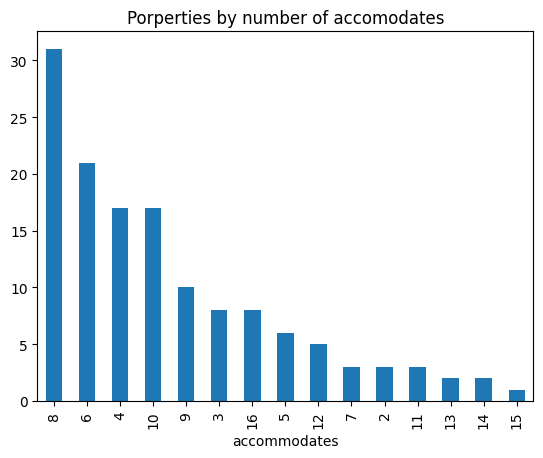

In [195]:
listings[
    (listings["property_type"].isin(benchmark_price_rating)) & (listings["neighbourhood_cleansed"] == "Shibuya Ku")
].groupby("accommodates").agg("id").count().sort_values(ascending=False).plot.bar(title="Porperties by number of accomodates")

Se observa que para el vecindario de Shibuya, son más comunes las propiedades con una gran cantidad de habitaciones.

A contunuación se hará el mismo análisis para el segundo vecindario con el mejor score bayesiano Taito ku

## Taito ku

In [196]:
rating_price_median_taito = listings[
    listings["neighbourhood_cleansed"] == "Taito Ku"
][interest_columns].groupby("property_type").agg({"review_scores_rating": "median", "price": "median"})

In [197]:
rating_price_median_taito["price_rating_geometric_median"] = rating_price_median_taito.apply(
    lambda row: np.sqrt(row["review_scores_rating"] * row["price"]), axis=1
)

rating_price_median_taito.sort_values("price_rating_geometric_median", ascending=False)[:5]

,review_scores_rating,price,price_rating_geometric_median
property_type,,,
Entire place,4.890,48457.0,486.779961
Entire villa,4.960,38700.0,438.123270
Entire townhouse,4.855,36371.5,420.218553
Entire loft,4.650,36143.0,409.957254
Private room in minsu,4.750,34286.0,403.557307


In [198]:
benchmark_price_rating = rating_price_median_taito.sort_values("price_rating_geometric_median", ascending=False)[:5].index

In [199]:
listings[
    (listings["property_type"].isin(benchmark_price_rating)) & (listings["neighbourhood_cleansed"] == "Taito Ku")
].groupby("accommodates").agg("id").count().sort_values(ascending=False)

accommodates
3    6
5    5
4    3
8    2
2    1
6    1
Name: id, dtype: int64

<Axes: title={'center': 'Porperties by number of accomodates'}, xlabel='accommodates'>

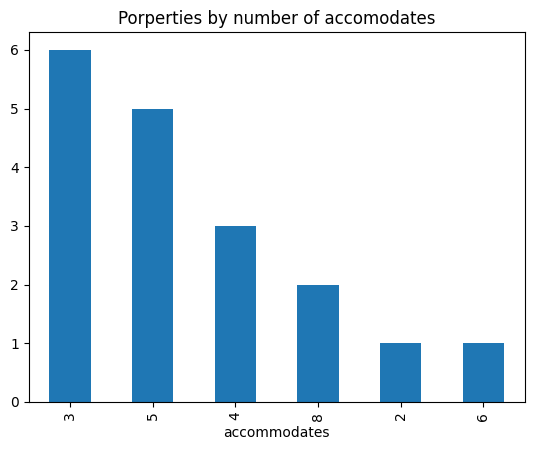

In [200]:
listings[
    (listings["property_type"].isin(benchmark_price_rating)) & (listings["neighbourhood_cleansed"] == "Taito Ku")
].groupby("accommodates").agg("id").count().sort_values(ascending=False).plot.bar(title="Porperties by number of accomodates")